In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/datatraining[1].txt')

In [ ]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
feature_names = [
    'Temperature', 'Humidity', 'Light', 'CO2',
       'HumidityRatio',
    ]

target_name = 'Occupancy'

X = df[feature_names]
y = df[target_name]

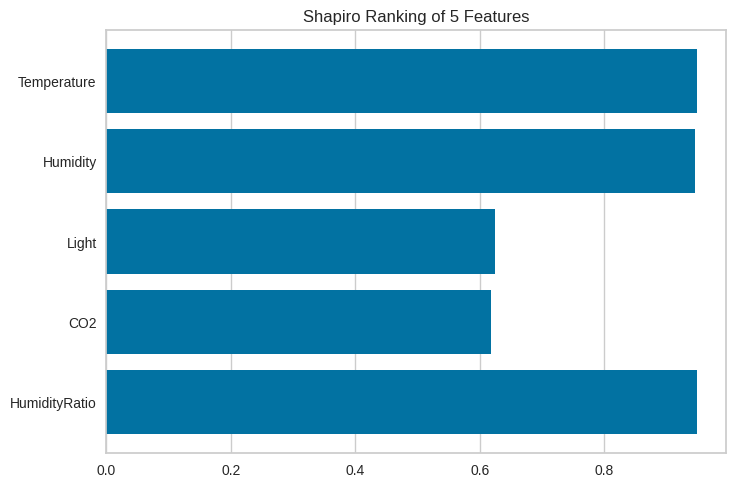

<Axes: title={'center': 'Shapiro Ranking of 5 Features'}>

In [ ]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features=feature_names, algorithm='shapiro')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

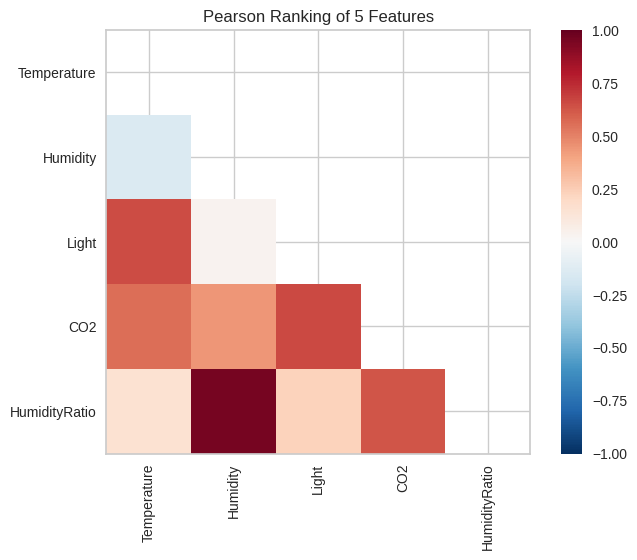

<Axes: title={'center': 'Pearson Ranking of 5 Features'}>

In [ ]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(features=feature_names, algorithm='pearson')

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [ ]:
train=pd.read_csv('/content/datatraining[1].txt',header=0, index_col=1, parse_dates=True, squeeze=True)
train.drop('date', axis=1, inplace=True)
train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
test = pd.read_csv('/content/datatest[1].txt', header=0, index_col=1, parse_dates=True, squeeze=True)
test.drop('date', axis=1, inplace=True)
test.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
validate = pd.read_csv('/content/datatest2[1].txt', header=0, index_col=1, parse_dates=True, squeeze=True)
validate.drop('date', axis=1, inplace=True)
validate.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


<Axes: >

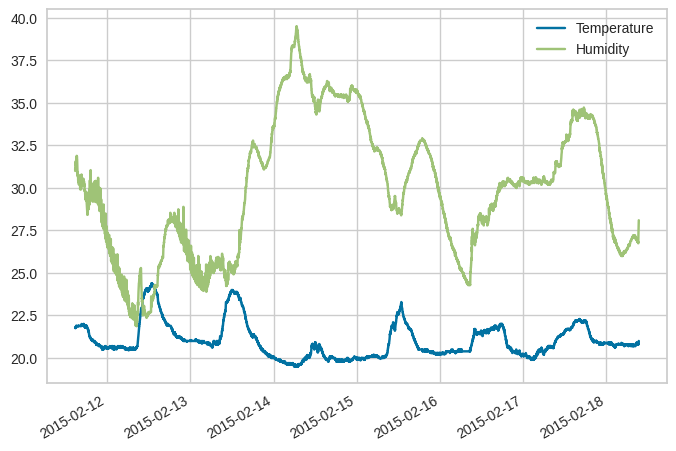

In [ ]:
validate[['Temperature', 'Humidity']].plot()

<Axes: >

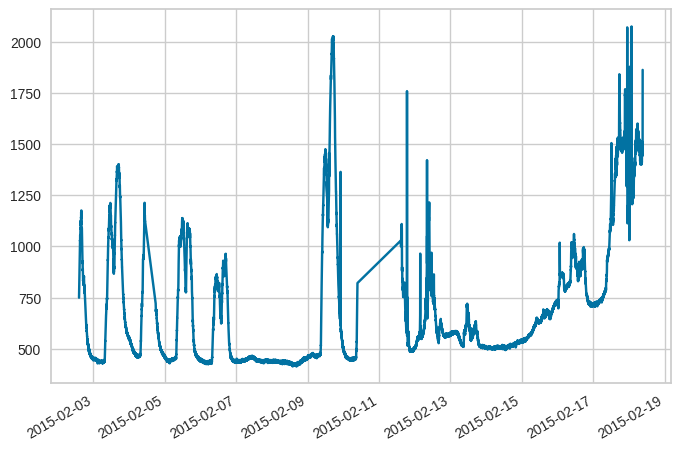

In [ ]:
data = pd.concat([test, train, validate])
data["CO2"].plot()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
values = data.values
X, y = values[:, :-1], values[:, -1]
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)

Naive Model

In [ ]:
def naive_prediction(testX, value):
	return [value for x in range(len(testX))]
for value in [0, 1]:
	yhat = naive_prediction(testX, value)
	score = accuracy_score(testy, yhat)
	print('Naive=%d score=%.3f' % (value, score))

Naive=0 score=0.822
Naive=1 score=0.178


Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(trainX, trainy)
yhat = model.predict(testX)
score = accuracy_score(testy, yhat)
print(score)


0.992704280155642


In [ ]:
features = [0, 1, 2, 3, 4]
for f in features:
	X, y = values[:, f].reshape((len(values), 1)), values[:, -1]
	trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)
	model = LogisticRegression()
	model.fit(trainX, trainy)
	score = accuracy_score(testy, yhat)
	print('feature=%d, name=%s, score=%.3f' % (f, data.columns[f], score))

feature=0, name=Temperature, score=0.993
feature=1, name=Humidity, score=0.993
feature=2, name=Light, score=0.993
feature=3, name=CO2, score=0.993
feature=4, name=HumidityRatio, score=0.993
